In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Load and Split Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize Pixel values to be btw 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 3s 0us/step


### Let's look at one image

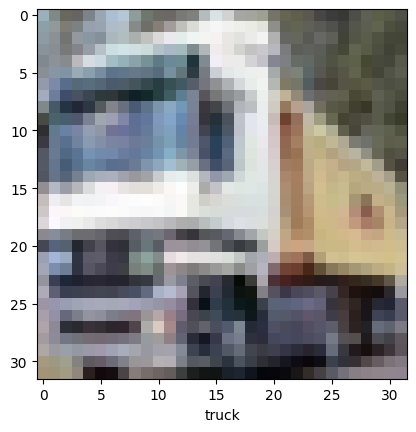

In [ ]:
IMG_INDEX = 1 # Change this to look at other images
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### CNN Architecture
##### A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers. To idea is that the stack of convolutional and maxPooling layers extract the feature from the image. Then these features are flattened and fed to densely connected layers that determiene the class of an image based on the presence of features.
#### We will start by building the Convolutional Base

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

After looking at the summary we should notice that the depth of our image increases but the spacial dimensions reduce drastically.

### Adding Dense Layers

So far, we have just completed the convolutional base, Now, we need to pass these extracted features and find a way to classify them, so we will add the following layers to our model.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Training
Now, we will train and compile the model using the recommended hyper parameters from tensorflow

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5369 - accuracy: 0.4372 - val_loss: 1.2485 - val_accuracy: 0.5532
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1853 - accuracy: 0.5808 - val_loss: 1.0907 - val_accuracy: 0.6149
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0425 - accuracy: 0.6334 - val_loss: 0.9978 - val_accuracy: 0.6500
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9500 - accuracy: 0.6668 - val_loss: 0.9512 - val_accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8795 - accuracy: 0.6908 - val_loss: 0.9489 - val_accuracy: 0.6748
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8242 - accuracy: 0.7116 - val_loss: 0.9366 - val_accuracy: 0.6718
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7760 - accuracy: 0.7278 - val_loss: 0.9020 -

### Evaluating the Model
Testing how well our model is performing using our test dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8668 - accuracy: 0.7014 - 4s/epoch - 13ms/step
0.7013999819755554


### Small Datasets
In the situation where we dont have millions of images, it is difficult to train a CNN from scratch. Below, we would learn about a few technique we can use to train CNN's on small dataset of just a few thousand images.

### Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one, we can use a technique called data augmentation. This is simply performing random transformations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.
Fortunately, keras can help us do this. Look at the code below for an example of data augmentation

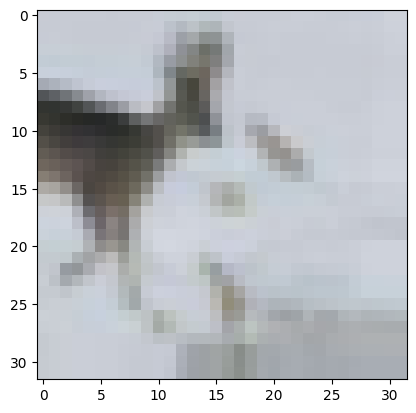

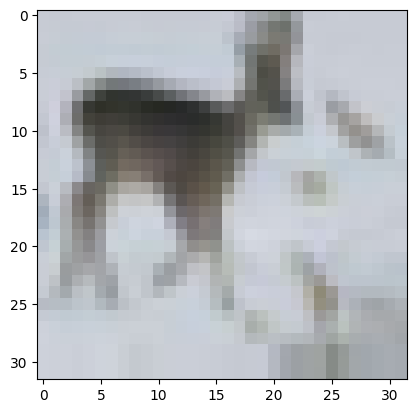

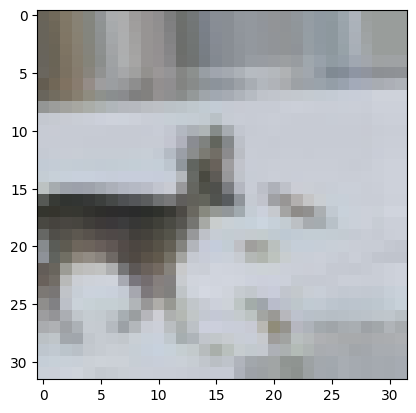

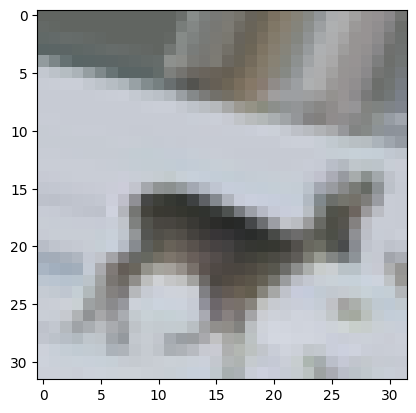

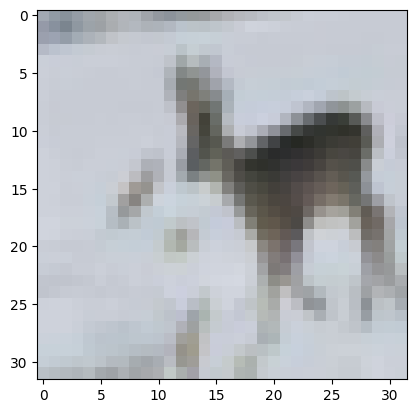

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Creates a data enerator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#  Pick an image ro trnasform
test_img = train_images[20]
img = image.img_to_array(test_img) # Convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

# This loop runs forever until we break, saving images to current directory
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4: # show 4 images
    break

plt.show()

### Pretrained Models
We know that CNNs alone (with no dense layers) dont do anything other than map the presence of features from our input. This means we can usee a pretrained CNN, one trained on millions of images, as the start of our model.This will allow us to have a very good convolutional base before adding our own dense layered classifier at the end. In fact by using this technique, we can train a very good classifier for a relatively small dataset (< 10,000 images). This is because the convnet already has a very good idea of what features to look for in an image and can find them very effectively. So, if we can determine the presence of features all the rest of the model needs to do is to determine which combination of features makes a specific image.

### Fine Tuning
 When we employ thetechnique defined above we will often want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our  convolutional base but only adjusting the final few. We do this because the first layers in our base are very good at extracting low level features like lines and edges, things that are similar for any kind of image. Where the later layers are better at picking up very specific features like shapes or even eyes. If we adjust the final layers then we can look for only features relevant to our very specific problem.

### Using a Pretrained Model
In this section we will combine the techniques we learned about and use a pretrained model and fine tunning to classify images of dogs and cats using a fairly small dataset.
This is based on the guide from the TensorFlow documentation  https://www.tensorflow.org/tutorials/images/transfer_learning

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

### Dataset
We will load the cats_vs_dogs dataset from the module tensorflow_datasets
This datasets contains (iaage, labels) pairs where images have different dimensions and 3 color channels.

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Split the data manually into 80% training, 10% testing, 10% vaidation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

KeyboardInterrupt: 

In [ ]:
get_label_name = metadata.features['label'].int2str #creates a function object that we can use to get labels

# Display 2 images from the dataset
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

### Data Preprocessing
Since the sizes of our images are all different we need to convert them all to the same size.

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  # returns an image that is reshaped to IMG_SIZE
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

Now we can apply this function to all our images using map

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

Finally we will shuffle and batch the images

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Now if we look at the shape of an original image vs the new image, we will see it has been changed.

In [ ]:
for img, label in raw_train.take(2):
  print('Origical Shape:', img.shape)

  for img, label in train.take(2):
    print('New Shape:', img.shape)

### Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the MobileNet V2 developed at google. This model is trained on 1.4 million images and has 1000 different classes.
We want to use this model but only its convolutional base. So when we load in the model, we'll specify that we dont want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from imagenet(Googles dataset)

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre_trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
# include top signifies if we want the classifier that comes with this network and we said false

In [ ]:
base_model.summary()

At this point this base_model will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of different filters/features.

In [ ]:
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

### Freezing the Base
The term freezing refers to disabling the training property of a layer. It simply means we wont make any changes to the weights of any layers that are frozen during training. This is important as we dont want to change the convolutional  base that  already has learned weights.

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

### Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer, we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally we will add the prediction layer that will be a single dense neuron. We can do this becuase we only have two classes to predict for

In [ ]:
prediction_layer = keras.layers.Dense(1)

Now, we will combine these layers together in a model

In [ ]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [ ]:
model.summary()

### Training the Model
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizer.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps=20

loss0, accuracy0 = model.evaluate(validation_batches, steps= validation_steps)

In [ ]:
# Now, we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

In [ ]:
# This code blocks show how we can save a model and load it in tensorflow
# We save it in .h5 format which is specifis to Keras not tensorflow
model.save('dogs_vs_cats.h5')
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')